### Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [26]:
data = pd.read_csv('household_power_consumption.csv',
             	sep=';',
             	parse_dates={'datetime': ['Date', 'Time']},
             	infer_datetime_format=True,
             	na_values=['?'],
             	low_memory=False)

/tmp/ipykernel_243266/902100628.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv('household_power_consumption.csv',
/tmp/ipykernel_243266/902100628.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('household_power_consumption.csv',
/tmp/ipykernel_243266/902100628.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('household_power_consumption.csv',


In [27]:
data

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,2010-11-26 21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [28]:
data_copy = data.copy()

### Preprocessing and dropping off NAN values

In [29]:
data = data.dropna()
data['Global_active_power'] = data['Global_active_power'].astype(float)
data = data.set_index('datetime')

/tmp/ipykernel_243266/2760450712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Global_active_power'] = data['Global_active_power'].astype(float)


In [30]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


### 1. Average active power condition in March 2007

In [31]:
data_march = data['2007-03-01':'2007-03-31']

data_march.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-03-01 00:00:00,0.226,0.0,243.19,1.0,0.0,0.0,0.0
2007-03-01 00:01:00,0.222,0.0,243.52,1.0,0.0,0.0,0.0
2007-03-01 00:02:00,0.218,0.0,242.60,0.8,0.0,0.0,0.0
2007-03-01 00:03:00,0.220,0.0,243.11,0.8,0.0,0.0,0.0
2007-03-01 00:04:00,0.220,0.0,242.88,0.8,0.0,0.0,0.0


In [32]:
monthly_avg_march = data_march['Global_active_power'].resample('ME').mean()

monthly_avg_march

datetime
2007-03-31    1.318627
Freq: ME, Name: Global_active_power, dtype: float64

### 2. What hour of the day had the highest power usage on Christmas 2006?

In [33]:
christmas_range = pd.date_range(start='2006-12-25 00:00:00', end='2006-12-25 23:59:00', freq='min')

data_christmas_2006 = data[data.index.isin(christmas_range)]

hourly_data = data_christmas_2006.resample('h').mean()

hourly_data['Global_active_power'].argmax(), hourly_data['Global_active_power'].max()

(22, 4.2148666666666665)

 ### 3. Compare energy usage (Global_active_power) on weekdays vs weekends.

In [34]:
data['dayofweek'] = data.index.dayofweek
data['week_part'] = data['dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

data['weekly_avg_power'] = data.groupby(['datetime', 'week_part'])['Global_active_power'].transform('mean')

weekly_comparison = data.groupby('week_part')['Global_active_power'].mean()

print(weekly_comparison)

week_part
Weekday    1.035472
Weekend    1.234232
Name: Global_active_power, dtype: float64


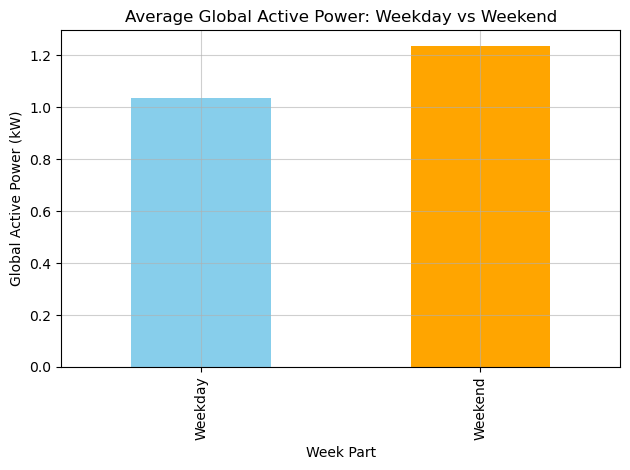

In [35]:
weekly_comparison.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Global Active Power: Weekday vs Weekend')
plt.ylabel('Global Active Power (kW)')
plt.xlabel('Week Part')
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.show()

### 4. Find days where energy consumption exceeded 5 kWh.

In [36]:
data['date'] = data.index.date

daily_aggregate = data.groupby('date')['Global_active_power'].sum().reset_index()

In [37]:
daily_aggregate

,date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1428,2010-11-22,2041.536
1429,2010-11-23,1577.536
1430,2010-11-24,1796.248
1431,2010-11-25,1431.164


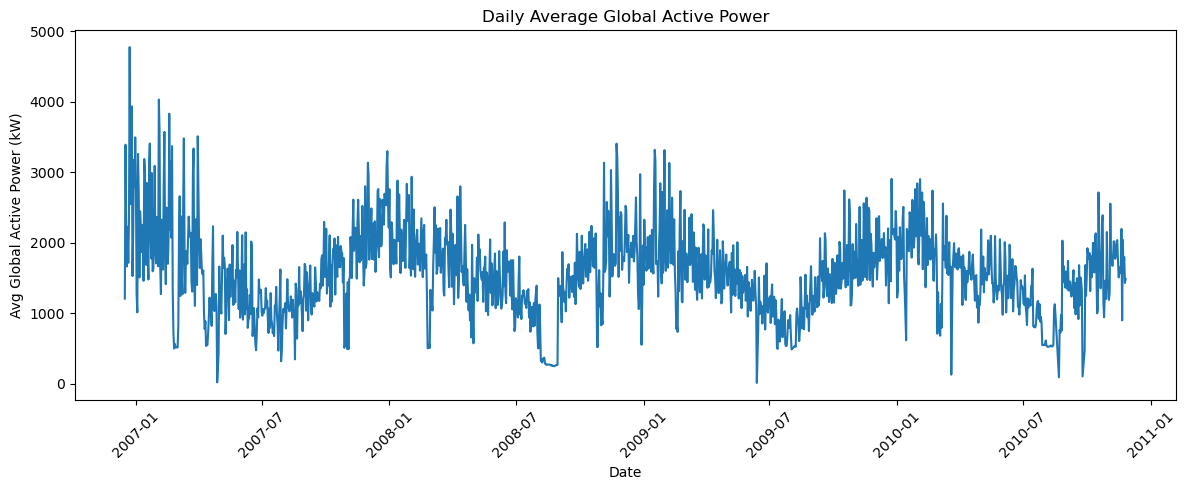

In [38]:
plt.figure(figsize=(12,5))
plt.plot(daily_aggregate['date'], daily_aggregate['Global_active_power'], color='C0')
plt.title('Daily Average Global Active Power')
plt.xlabel('Date')
plt.ylabel('Avg Global Active Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
days_exceeding_5kwh = daily_aggregate[daily_aggregate['Global_active_power'] >= 5]
days_exceeding_5kwh

,date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748
...,...,...
1428,2010-11-22,2041.536
1429,2010-11-23,1577.536
1430,2010-11-24,1796.248
1431,2010-11-25,1431.164


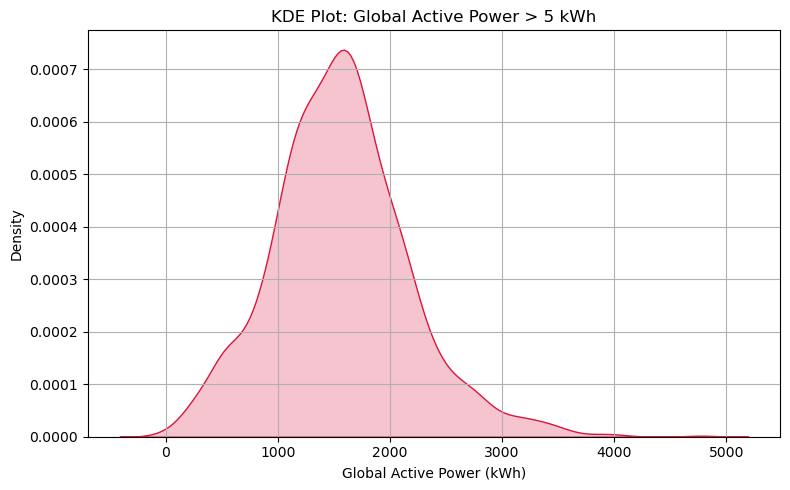

In [40]:
plt.figure(figsize=(8, 5))
sns.kdeplot(days_exceeding_5kwh['Global_active_power'], fill=True, color='crimson')

plt.title('KDE Plot: Global Active Power > 5 kWh')
plt.xlabel('Global Active Power (kWh)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. Plot the energy usage trend for the first week of January 2007.

In [41]:
data_jan_2007 = data['2007-01-01':'2007-01-08']

In [42]:
data_jan_2007.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,dayofweek,week_part,weekly_avg_power,date
datetime,,,,,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,0,Weekday,2.580,2007-01-01
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,0,Weekday,2.552,2007-01-01
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,0,Weekday,2.550,2007-01-01
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,0,Weekday,2.550,2007-01-01
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,0,Weekday,2.554,2007-01-01


In [43]:
daily_agg_jan2007 = data_jan_2007.resample('D')['Global_active_power'].mean().reset_index()

daily_agg_jan2007

,datetime,Global_active_power
0,2007-01-01,1.909031
1,2007-01-02,0.881414
2,2007-01-03,0.704204
3,2007-01-04,2.263481
4,2007-01-05,1.884281
5,2007-01-06,1.047485
6,2007-01-07,1.699736
7,2007-01-08,1.556500


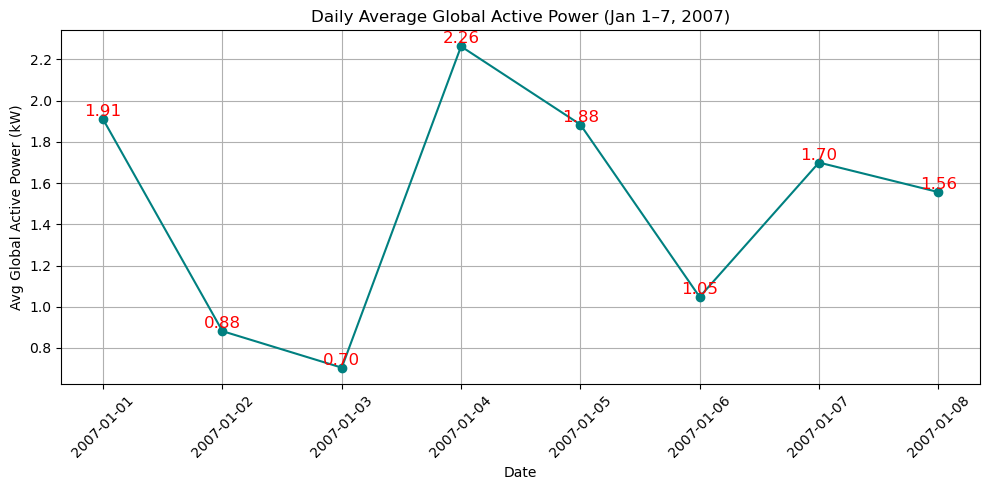

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(daily_agg_jan2007['datetime'], daily_agg_jan2007['Global_active_power'], marker='o', color='teal')

plt.title('Daily Average Global Active Power (Jan 1–7, 2007)')
plt.xlabel('Date')
plt.ylabel('Avg Global Active Power (kW)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

for x, y in zip(daily_agg_jan2007['datetime'], daily_agg_jan2007['Global_active_power']):
    plt.text(x, y, f'{y:.2f}', fontsize=12, ha='center', va='bottom', color='red')

plt.show()

### 6. Find the average voltage for each day of the first week of February 2007

In [45]:
data_copy = data.copy()
data_copy.index = pd.to_datetime(data_copy.index)
data_feb_2007 = data_copy[:'2007-02-28']
first_week_feb = data_feb_2007['2007-02-01':'2007-02-07']
daily_voltage = first_week_feb['Voltage'].resample('D').mean().reset_index()
daily_voltage

,datetime,Voltage
0,2007-02-01,240.392139
1,2007-02-02,240.334389
2,2007-02-03,238.910194
3,2007-02-04,239.633333
4,2007-02-05,240.810312
5,2007-02-06,241.264160
6,2007-02-07,241.149694


### 7. What is the correlation between global active power and sub-metering values?

In [46]:
data_copy

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,dayofweek,week_part,weekly_avg_power,date
datetime,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,5,Weekend,4.216,2006-12-16
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,5,Weekend,5.360,2006-12-16
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,5,Weekend,5.374,2006-12-16
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,5,Weekend,5.388,2006-12-16
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,5,Weekend,3.666,2006-12-16
...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,4,Weekday,0.946,2010-11-26
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,4,Weekday,0.944,2010-11-26
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,4,Weekday,0.938,2010-11-26


In [47]:
corr_data = data_copy[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
correlation_matrix = corr_data.corr()
print(correlation_matrix['Global_active_power'])

Global_active_power    1.000000
Sub_metering_1         0.484401
Sub_metering_2         0.434569
Sub_metering_3         0.638555
Name: Global_active_power, dtype: float64


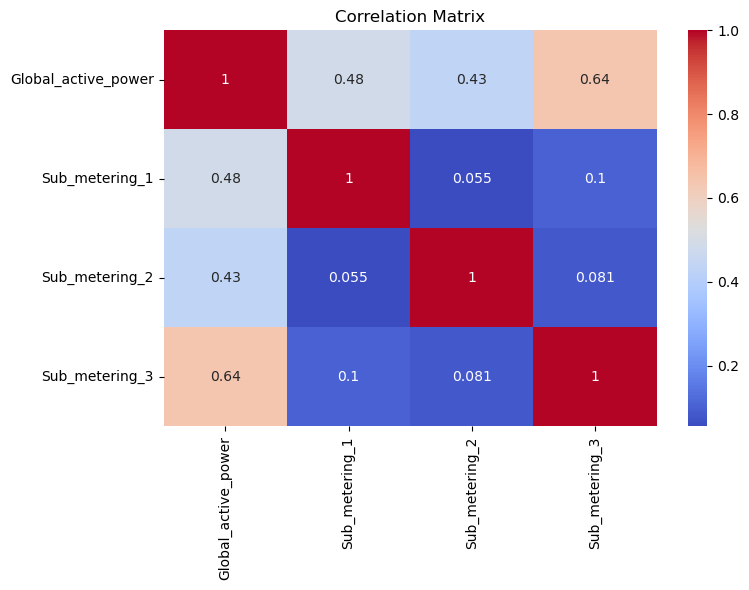

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()